In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 
  
# metadata 
print(predict_students_dropout_and_academic_success.metadata) 
  
# variable information 
print(predict_students_dropout_and_academic_success.variables) 


{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

# configuration de l'affichage pour voir toutes les colonnes
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

def load_and_audit_data():
    print("--- 1. Chargement du dataset ---")
    dataset = fetch_ucirepo(id=697) 
    
    # extraction des DataFrames
    X = dataset.data.features 
    y = dataset.data.targets 
    
    # fusion temporaire pour une analyse globale
    df = pd.concat([X, y], axis=1)
    
    print(f"Dimensions du dataset : {df.shape[0]} lignes, {df.shape[1]} colonnes\n")
    
    print("--- 2. Types de variables et Valeurs manquantes ---")
    audit_df = pd.DataFrame({
        'Type': df.dtypes,
        'Manquants (%)': (df.isnull().sum() / len(df) * 100).round(2),
        'Valeurs Uniques': df.nunique()
    })
    print(audit_df)
    
    print("\n--- 3. Statistiques Descriptives (Résumé Économétrique) ---")
    display(df.describe().T.round(2))
    
    return df, X, y

df, X, y = load_and_audit_data()

--- 1. Chargement du dataset ---
Dimensions du dataset : 4424 lignes, 37 colonnes

--- 2. Types de variables et Valeurs manquantes ---
                                                   Type  Manquants (%)  \
Marital Status                                    int64            0.0   
Application mode                                  int64            0.0   
Application order                                 int64            0.0   
Course                                            int64            0.0   
Daytime/evening attendance                        int64            0.0   
Previous qualification                            int64            0.0   
Previous qualification (grade)                  float64            0.0   
Nacionality                                       int64            0.0   
Mother's qualification                            int64            0.0   
Father's qualification                            int64            0.0   
Mother's occupation                               i

,count,mean,std,min,25%,50%,75%,max
Marital Status,4424.0,1.18,0.61,1.00,1.00,1.00,1.00,6.00
Application mode,4424.0,18.67,17.48,1.00,1.00,17.00,39.00,57.00
Application order,4424.0,1.73,1.31,0.00,1.00,1.00,2.00,9.00
Course,4424.0,8856.64,2063.57,33.00,9085.00,9238.00,9556.00,9991.00
Daytime/evening attendance,4424.0,0.89,0.31,0.00,1.00,1.00,1.00,1.00
Previous qualification,4424.0,4.58,10.22,1.00,1.00,1.00,1.00,43.00
Previous qualification (grade),4424.0,132.61,13.19,95.00,125.00,133.10,140.00,190.00
Nacionality,4424.0,1.87,6.91,1.00,1.00,1.00,1.00,109.00
Mother's qualification,4424.0,19.56,15.60,1.00,2.00,19.00,37.00,44.00
Father's qualification,4424.0,22.28,15.34,1.00,3.00,19.00,37.00,44.00


### 1. Analyse de la Variable Cible


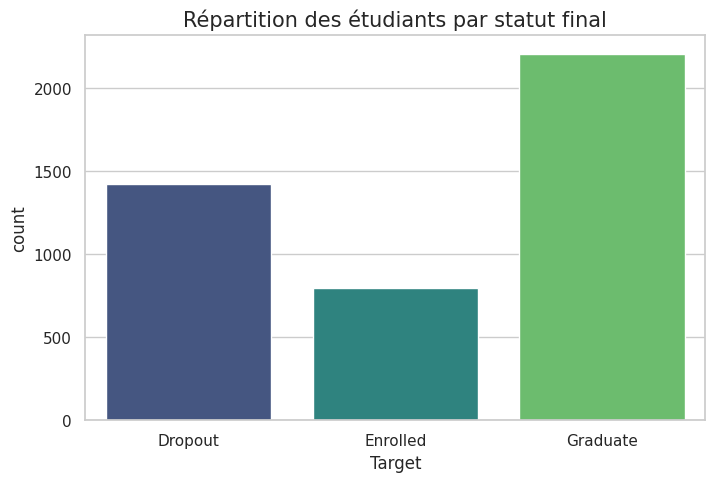

### 2. Analyse des Notes (Grades)


/tmp/ipykernel_1047/1065113921.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Target', y='Curricular units 1st sem (grade)', ax=axes[0], palette='Set2')
/tmp/ipykernel_1047/1065113921.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Target', y='Curricular units 2nd sem (grade)', ax=axes[1], palette='Set2')


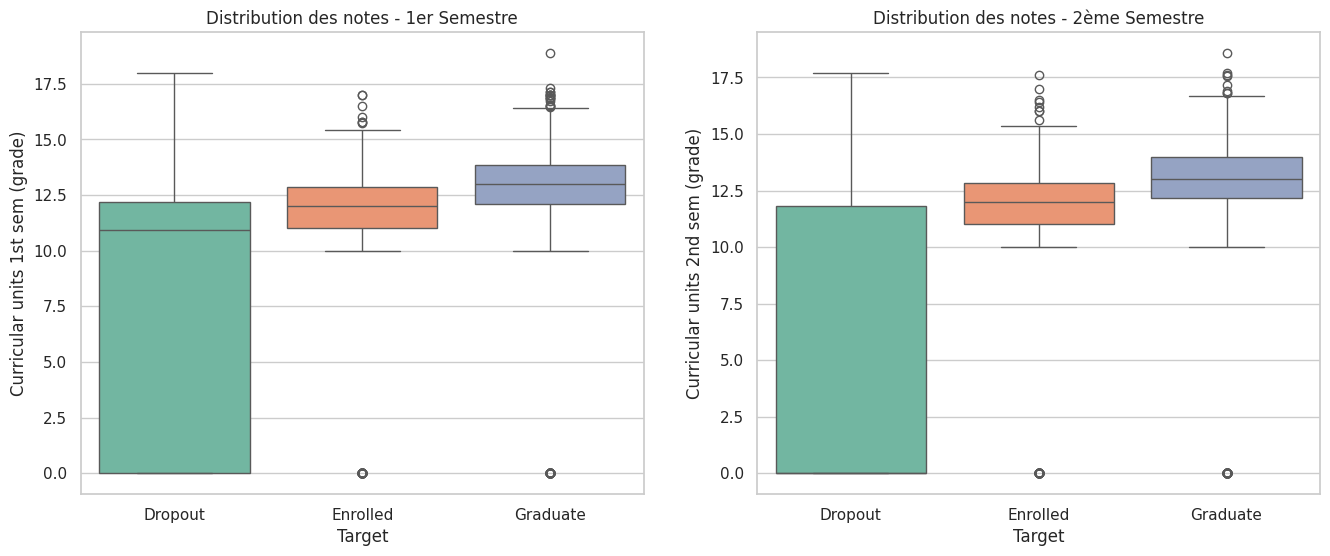

### 3. Impact du Genre et des Bourses


In [ ]:
target_order = ['Dropout', 'Enrolled', 'Graduate']
df['Target'] = pd.Categorical(df['Target'], categories=target_order, ordered=True)

# Configuration esthétique
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 8)

print("### 1. Analyse de la Variable Cible")
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Target', hue='Target', palette='viridis', legend=False)
plt.title("Répartition des étudiants par statut final", fontsize=15)
plt.show()

# PERFORMANCE ACADÉMIQUE (ÉCONOMÉTRIE DU RÉSULTAT) ---
print("### 2. Analyse des Notes (Grades)")
# Comparaison des notes S1 et S2 selon le statut
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df, x='Target', y='Curricular units 1st sem (grade)', ax=axes[0], palette='Set2')
axes[0].set_title("Distribution des notes - 1er Semestre")

sns.boxplot(data=df, x='Target', y='Curricular units 2nd sem (grade)', ax=axes[1], palette='Set2')
axes[1].set_title("Distribution des notes - 2ème Semestre")
plt.show()

#  FACTEURS SOCIO-ÉCONOMIQUES ---
print("### 3. Impact du Genre et des Bourses")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gender (1: Male, 0: Female)
sns.histplot(data=df, x='Target', hue='Gender', multiple='dodge', shrink=.8, ax=axes[0])
axes[0].set_title("Réussite par Genre (0=F, 1=M)")

# Scholarship holder (1: Yes, 0: No)
sns.histplot(data=df, x='Target', hue='Scholarship holder', multiple='dodge', shrink=.8, ax=axes[1])
axes[1].set_title("Impact de la Bourse d'études")
plt.show()

# FACTEURS MACROÉCONOMIQUES ---
# On définit les variables macro
macro_vars = ['Unemployment rate', 'Inflation rate', 'GDP']

# Création d'une figure avec 3 graphiques côte à côte
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, var in enumerate(macro_vars):
    # On trace un boxplot pour voir la distribution de la variable macro selon la cible
    sns.boxplot(data=df, x='Target', y=var, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Impact du {var}', fontsize=14)
    axes[i].set_xlabel('Statut de l\'étudiant')
    axes[i].set_ylabel('Valeur (%) ou Index')

plt.tight_layout()
plt.show()

# --- Statistique descriptive groupée pour confirmer les graphes ---
print("\n--- MOYENNES DES VARIABLES MACRO PAR GROUPE ---")
print(df.groupby('Target')[macro_vars].mean().round(3))

# TABLEAU RÉCAPITULATIF (GROUPBY) ---
print("\n--- TABLEAU RÉCAPITULATIF : MOYENNES PAR CATÉGORIE ---")
summary_table = df.groupby('Target', observed=True).agg({
    'Age at enrollment': 'mean',
    'Curricular units 1st sem (grade)': 'mean',
    'Curricular units 2nd sem (grade)': 'mean',
    'Admission grade': 'mean',
    'Scholarship holder': 'mean' # Proportion de boursiers
}).round(2)

display(summary_table)

# MULTICOLLINÉARITÉ (MATRICE DE CORRÉLATION) ---
print("\n### 6. Matrice de Corrélation (Variables Numériques)")
plt.figure(figsize=(15, 10))
# on ne garde que les colonnes numériques pour la corrélation
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='RdBu_r', center=0, annot=False, linewidths=.5)
plt.title("Carte de chaleur des corrélations")
plt.show()